In [1446]:
import qiskit
import qiskit_ibm_runtime
import numpy as np
from numpy import pi


from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator

from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.circuit import Parameter

In [10]:
service = QiskitRuntimeService.save_account(token="*", instance="*", overwrite="True")

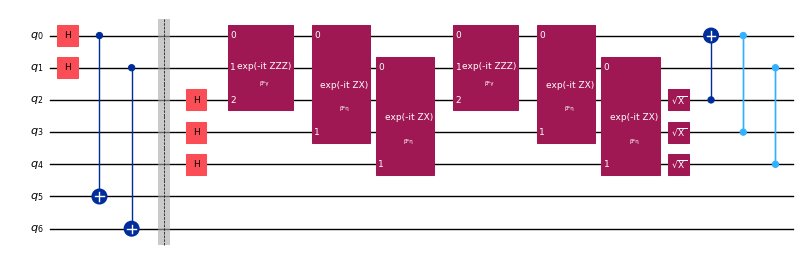

In [1398]:
γ = Parameter('γ')
η = Parameter('η')
β = Parameter('β')

X = SparsePauliOp("X")
Z = SparsePauliOp("Z")

qc_sym = QuantumCircuit(7)

qc_sym.h([0,1])
qc_sym.cx(0,5)
qc_sym.cx(1,6)
qc_sym.barrier()

ZZZ = PauliEvolutionGate(Z^Z^Z, time=β*γ)
ZX = PauliEvolutionGate(Z^X, time=β*η)

qc_sym.h([2,3,4])

qc_sym.append(ZZZ,[0,1,2])
qc_sym.append(ZX,[0,3])
qc_sym.append(ZX,[1,4])

qc_sym.append(ZZZ,[0,1,2])
qc_sym.append(ZX,[0,3])
qc_sym.append(ZX,[1,4])


qc_sym.sx([2,3,4])

qc_sym.cx(2,0)
qc_sym.cz(3,0)
qc_sym.cz(4,1)

qc_sym.draw("mpl",scale=0.5)

In [1340]:
sim = AerSimulator(method="statevector")

In [1426]:
H_sym = SparsePauliOp(["IIIIIZZ","IIIIIXI","IIIIIIX"], coeffs=[γ,η,η])

In [1586]:
H = H_sym.assign_parameters({γ:pi/4,η:pi/4})
H = SparsePauliOp(H.paulis, coeffs=np.asarray(H.coeffs, dtype=np.complex128)) #Forcing correct assignment

qc = qc_sym.assign_parameters({γ:pi/4,η:pi/4,β:-0.4})

In [1588]:
pm = generate_preset_pass_manager(backend=sim, optimization_level=3)
isa_qc = pm.run(qc)
isa_H = H.apply_layout(isa_qc.layout)

In [1590]:
estimator = Estimator(mode=sim, options={"default_shots": 10000})

In [1592]:
res = estimator.run([(isa_qc, isa_H)]).result()[0]
print(f"Expectation values: {res.data.evs}")

Expectation values: -1.5868184493282045
